<a href="https://colab.research.google.com/github/jhbeann/fast_deep/blob/main/2_2Scatter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
!ls -al '/gdrive/My Drive/data'

total 2171732
-rw------- 1 root root    337847 Oct 21 05:44 data_202001.csv
-rw------- 1 root root    314682 Oct 13 10:05 data_202002.csv
-rw------- 1 root root    335953 Oct 13 10:05 data_202003.csv
-rw------- 1 root root    988308 Oct 21 06:07 data_2020.csv
-rw------- 1 root root 783889122 Oct 20 09:02 TCS_영업소간통행시간_1시간_1개월_202001
-rw------- 1 root root 699429059 Oct 20 10:56 TCS_영업소간통행시간_1시간_1개월_202002
-rw------- 1 root root 738556069 Oct 20 10:55 TCS_영업소간통행시간_1시간_1개월_202003


# 2. Korean Characters

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

런타임 다시 시작

In [ ]:
# import pyplot as a alias 'plt'
import matplotlib.pyplot as plt
plt.rc('font', family = 'NanumBarunGothic')

# 3. Load data

In [ ]:
import pandas as pd
#load a file under "data" folder
file ="/gdrive/My Drive/data/data_2020.csv"
data = pd.read_csv(file)

In [ ]:
data.head()

,집계일자,집계시,출발영업소코드,도착영업소코드,통행시간,요일
0,20200101,4,101,105,637,2
1,20200101,4,101,105,773,2
2,20200101,4,101,105,762,2
3,20200101,4,101,105,746,2
4,20200101,4,101,105,875,2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37356 entries, 0 to 37355
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   집계일자     37356 non-null  int64
 1   집계시      37356 non-null  int64
 2   출발영업소코드  37356 non-null  int64
 3   도착영업소코드  37356 non-null  int64
 4   통행시간     37356 non-null  int64
 5   요일       37356 non-null  int64
dtypes: int64(6)
memory usage: 1.7 MB


# 4. 집계시

In [ ]:
data_06_22 = data[data['집계시'].isin(range(6,23))]

In [ ]:
data_06_22.sort_values(by='집계시')

,집계일자,집계시,출발영업소코드,도착영업소코드,통행시간,요일
25164,20200302,6,101,110,2772,0
22064,20200213,6,101,130,8044,3
12199,20200130,6,101,115,6542,3
6518,20200117,6,101,105,806,4
28006,20200309,6,101,115,7670,0
...,...,...,...,...,...,...
15006,20200207,22,101,105,991,4
16139,20200209,22,101,130,9075,6
28346,20200310,22,101,115,4747,1
16141,20200209,22,101,130,7947,6


In [ ]:
data_06_22_counting = data_06_22['집계시'].value_counts()

In [ ]:
data_06_22_counting

14    1766
12    1758
15    1755
13    1754
11    1744
10    1725
16    1724
17    1719
9     1703
18    1666
8     1662
19    1628
20    1611
7     1585
21    1559
22    1505
6     1440
Name: 집계시, dtype: int64

In [ ]:
data_06_22_counting_sorted = data_06_22_counting.sort_index()

In [ ]:
data_06_22_counting_sorted

6     1440
7     1585
8     1662
9     1703
10    1725
11    1744
12    1758
13    1754
14    1766
15    1755
16    1724
17    1719
18    1666
19    1628
20    1611
21    1559
22    1505
Name: 집계시, dtype: int64

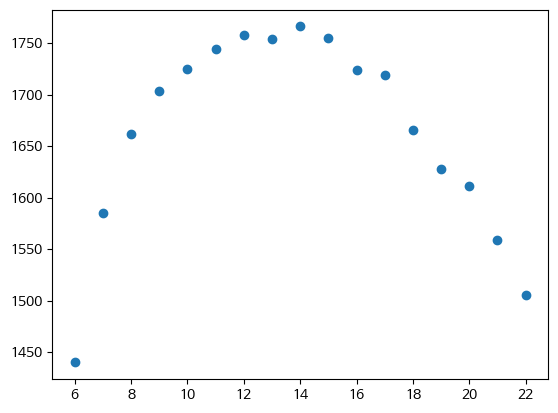

In [ ]:
plt.scatter(data_06_22_counting_sorted.index, data_06_22_counting_sorted.values)

In [ ]:
data_06_22_time = data_06_22['통행시간']
data_06_22_time

10         686
11         761
12         704
13         807
14         687
         ...  
37348     6938
37349    12477
37351      885
37352    13403
37354     3598
Name: 통행시간, Length: 28304, dtype: int64

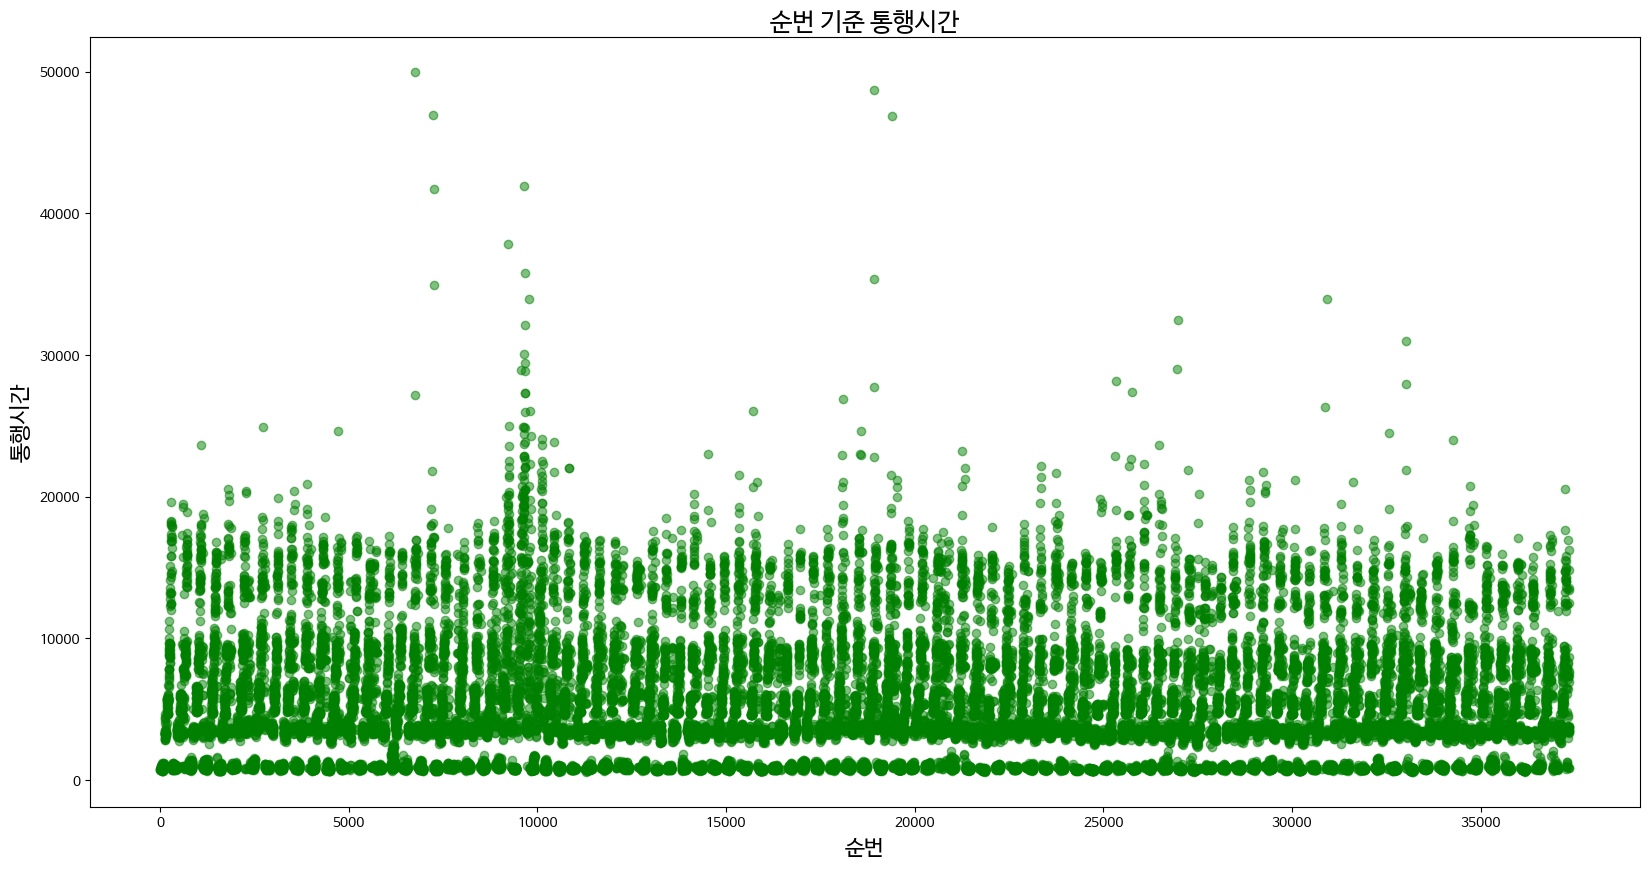

In [ ]:
# Configure figure size
plt.figure(figsize=(20,10))
# Creae scatter Chart
plt.scatter(data_06_22_time.index, data_06_22_time.values, c="g", alpha=0.5)
# Generate labels and title
plt.title("순번 기준 통행시간",fontsize=18)
plt.xlabel('순번', fontdict= {'size':16})
plt.ylabel('통행시간', fontdict= {'size':16})
# Show plot
plt.show()

# 5. 집계일자

In [ ]:
data_days = data.groupby(by=['집계일자']).mean()

In [ ]:
data_days

,집계시,출발영업소코드,도착영업소코드,통행시간,요일
집계일자,,,,,
20200101,12.070707,101.0,114.785354,5241.186869,2.0
20200102,12.179245,101.0,113.985849,4776.393868,3.0
20200103,11.780702,101.0,115.230263,5351.916667,4.0
20200104,11.694030,101.0,114.838308,5206.171642,5.0
20200105,12.508333,101.0,115.263889,5266.744444,6.0
...,...,...,...,...,...
20200327,12.363409,101.0,113.771930,4584.248120,4.0
20200328,11.332506,101.0,114.540943,4858.759305,5.0
20200329,12.288312,101.0,114.779221,4668.493506,6.0


In [ ]:
data_days_time = data_days['통행시간']

In [ ]:
data_days_time

집계일자
20200101    5241.186869
20200102    4776.393868
20200103    5351.916667
20200104    5206.171642
20200105    5266.744444
               ...     
20200327    4584.248120
20200328    4858.759305
20200329    4668.493506
20200330    4644.770833
20200331    4409.579710
Name: 통행시간, Length: 91, dtype: float64

In [ ]:
x = data_days_time.index

In [ ]:
labels = [str(i) for i in x]

In [ ]:
values = data_days_time.values

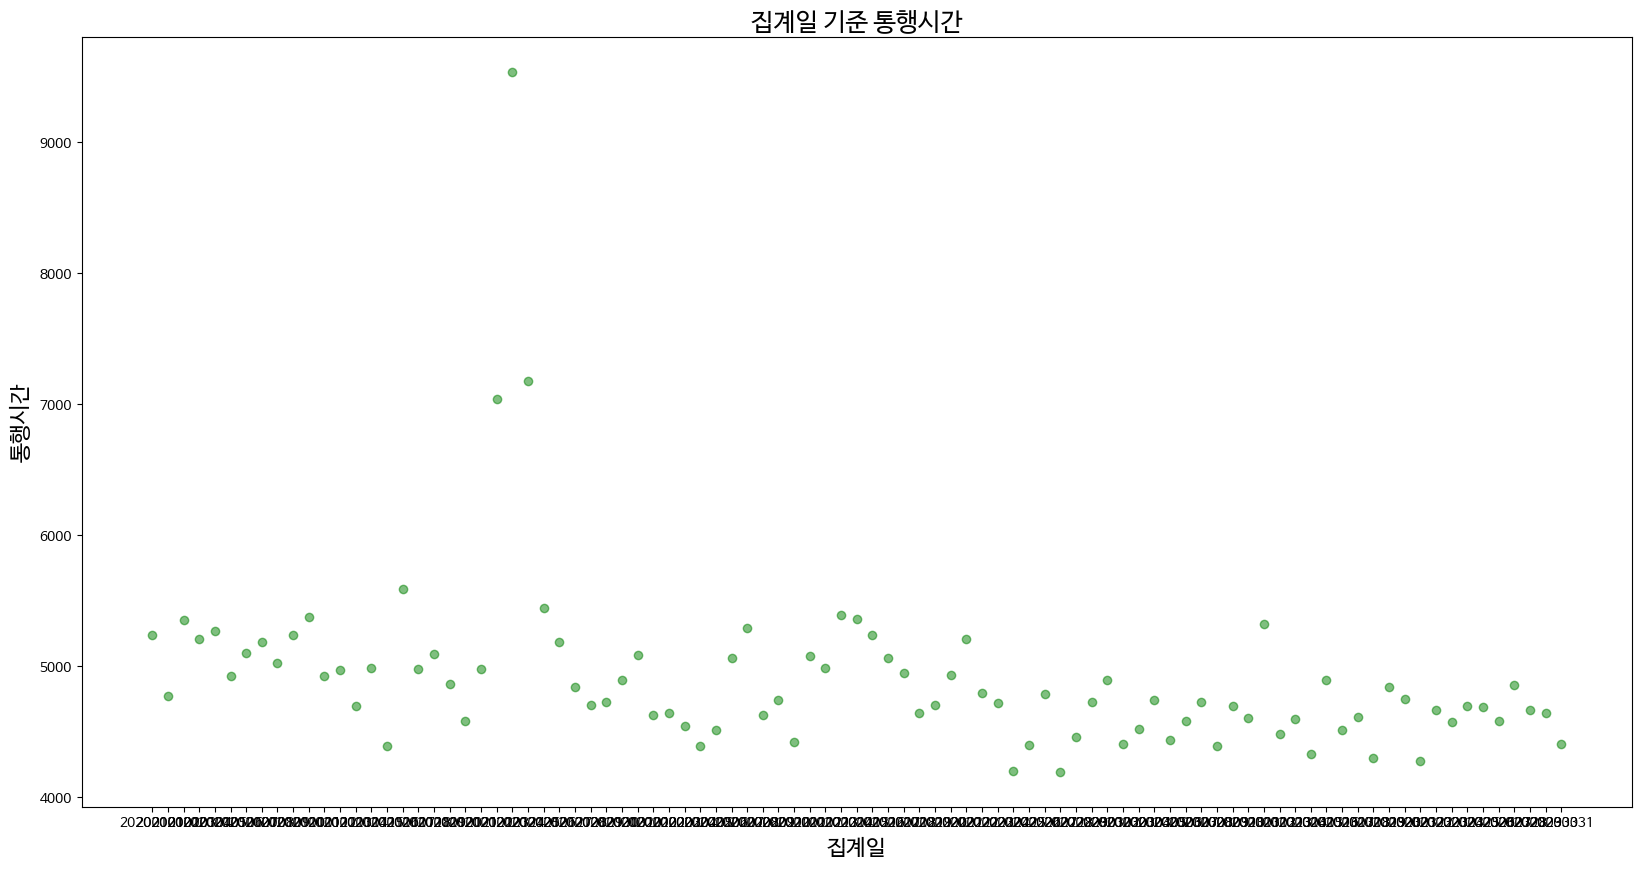

In [ ]:
# Configure figure size
plt.figure(figsize=(20,10))
# Creae scatter Chart
plt.scatter(labels,values, c="g", alpha=0.5)
# Generate labels and title
plt.title("집계일 기준 통행시간",fontsize=18)
plt.xlabel('집계일', fontdict= {'size':16})
plt.ylabel('통행시간', fontdict= {'size':16})
# Show plot
plt.show()

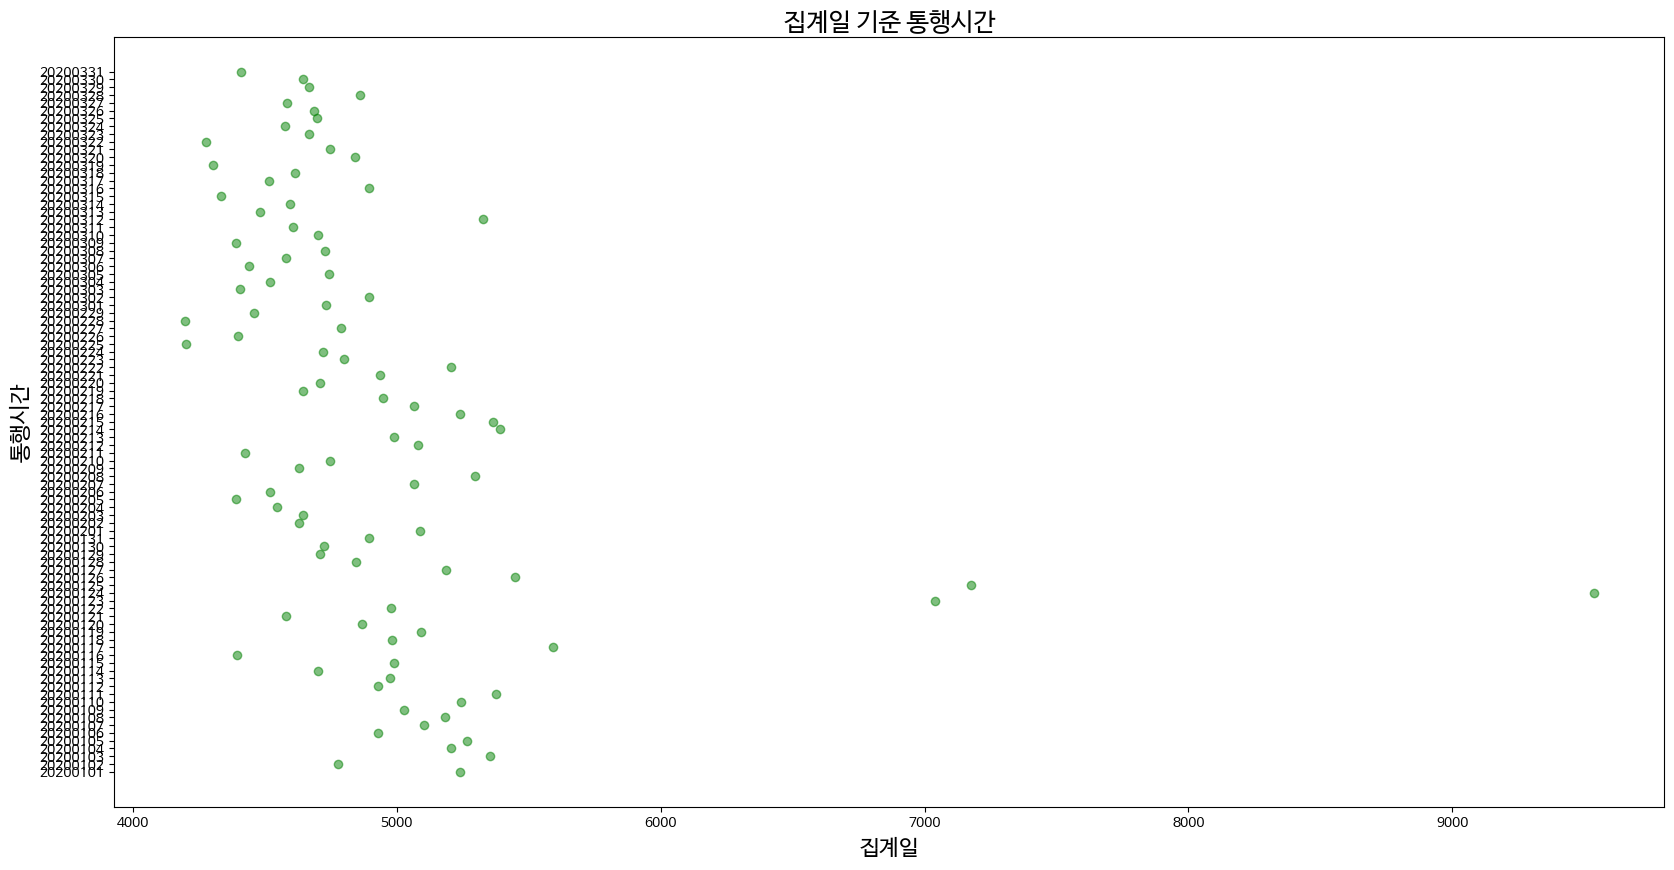

In [ ]:
# Configure figure size
plt.figure(figsize=(20,10))
# Creae scatter Chart
plt.scatter(values,labels, c="g", alpha=0.5)
# Generate labels and title
plt.title("집계일 기준 통행시간",fontsize=18)
plt.xlabel('집계일', fontdict= {'size':16})
plt.ylabel('통행시간', fontdict= {'size':16})
# Show plot
plt.show()

In [ ]:
#101,서울 105,기흥 110,목천 115,대전 120,황간 125,남구미 130,동김천 135,경주 14,부산
data_110_days = data[data['도착영업소코드'] == 110].groupby(by=['집계일자']).mean()
data_125_days = data[data['도착영업소코드'] == 125].groupby(by=['집계일자']).mean()
data_140_days = data[data['도착영업소코드'] == 140].groupby(by=['집계일자']).mean()

In [ ]:
data_110_days_time = data_110_days['통행시간']
data_125_days_time = data_125_days['통행시간']
data_140_days_time = data_140_days['통행시간']

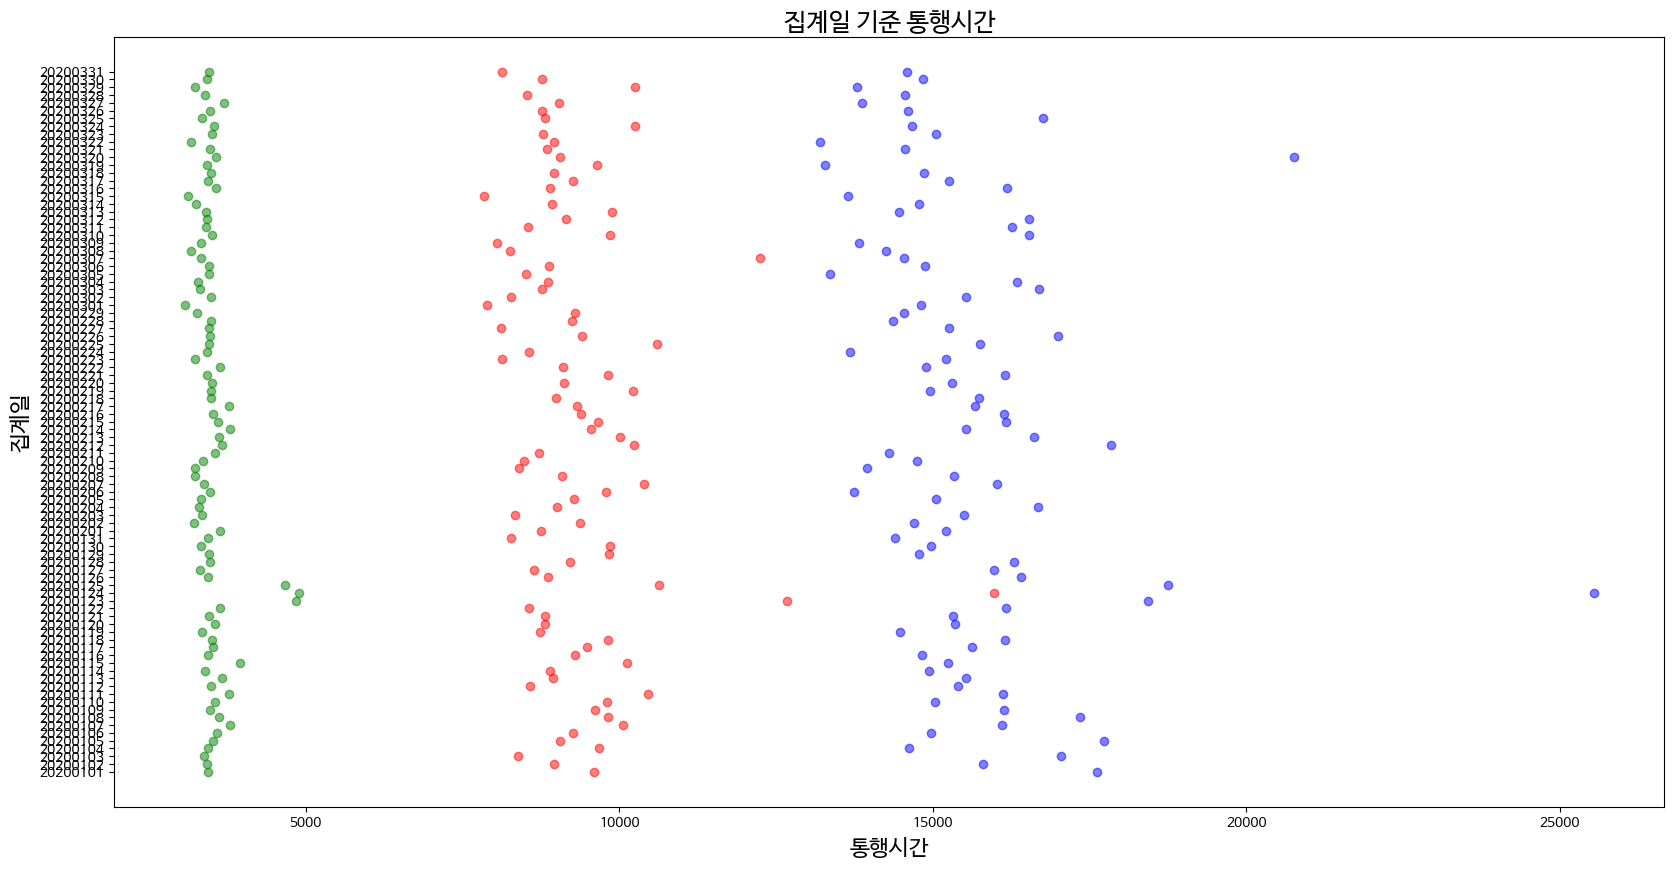

In [ ]:
# Configure figure size
plt.figure(figsize=(20,10))
# Creae scatter Chart
plt.scatter(data_110_days_time.values,labels, c="g", alpha=0.5)
plt.scatter(data_125_days_time.values,labels, c="r", alpha=0.5)
plt.scatter(data_140_days_time.values,labels, c="b", alpha=0.5)
# Generate labels and title
plt.title("집계일 기준 통행시간",fontsize=18)
plt.xlabel('통행시간', fontdict= {'size':16})
plt.ylabel('집계일', fontdict= {'size':16})
# Show plot
plt.show()